<h1 align="center">Распознавание мошеннических случаев в страховании транспортных средств</h2>

### Цель

Построить модели, используя различные виды алгоритмов анализа данных для решения задачи классификации случаев мошенничества в сфере страхования автотранспорта. Оценить модели путём сравнения метрик качества, выбрать наилучшую и подобрать для неё гиперпараметры (при необходимости).

### Структура датасета

<ul>
    <li><b>Month</b> - месяц, в который произошла авария</li>
    <li><b>WeekOfMonth</b> - порядковый номер недели в месяце, в который произошла авария</li>
    <li><b>DayOfWeek</b> - день недели, в который произошла авария</li>
    <li><b>Make</b> - марка</li>
    <li><b>AccidentArea</b> - местность происшествия</li>
    <li><b>DayOfWeekClaimed</b> - день недели подачи заявления о страховом случае</li>
    <li><b>MonthClaimed</b> - месяц подачи заявления о страховом случае</li>
    <li><b>WeekOfMonthClaimed</b> - порядковый номер недели в месяце подачи заявления о страховом случае</li>
    <li><b>Sex</b> - пол</li>
    <li><b>MaritalStatus</b> - семейный статус</li>
    <li><b>Age</b> - возраст водителя</li>
    <li><b>Fault</b> - виновное лицо</li>
    <li><b>PolicyType</b> - тип полиса</li>
    <li><b>VehicleCategory</b> - категория автомобиля</li>
    <li><b>VehiclePrice</b> - стоимость автомобиля</li>
    <li><b>PolicyNumber</b> - номер полиса</li>
    <li><b>RepNumber</b> - номер агента</li>
    <li><b>Deductible</b> - франшиза (невозмещаемая часть ущерба страхователя)</li>
    <li><b>DriverRating</b> - рейтинг водителя</li>
    <li><b>Days_Policy_Accident</b> - количество дней между покупкой полиса и страховым случаем</li>
    <li><b>Days_Policy_Claim</b> - количество дней, прошедших между покупкой полиса и подачей заявления о страховом случае</li>
    <li><b>PastNumberOfClaims</b> - количество ранее поданных заявлений</li>
    <li><b>AgeOfVehicle</b> - срок эксплуатации автомобиля</li>
    <li><b>AgeOfPolicyHolder</b> - возраст страхователя</li>
    <li><b>PoliceReportFiled</b> - факт подачи заявления в полицию</li>
    <li><b>WitnessPresent</b> - наличие свидетеля</li>
    <li><b>AgentType</b> - тип агента</li>
    <li><b>NumberOfSuppliments</b> - количество принимаемых медицинских препаратов, витаминов
    <li><b>AddressChange_Claim</b> - время с момента подачи заявления до момента, когда человек подал заявку на изменение адреса</li>
    <li><b>NumberOfCars</b> - число автомобилей, вовлечённых в страховой случай</li>
    <li><b>Year</b> - год</li>
    <li><b>BasePolicy</b> - вид страхового покрытия</li>
    <li><b>FraudFound_P</b> - обнаружено мошенничество</li>
</ul>

### Целевой атрибут

<b>FraudFound_P</b> - обнаружено мошенничество (1 - целевой класс)

## Этап 1. Сбор (загрузка) данных

### 1.1 Подключение необходимых библиотек

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

from imblearn.over_sampling import SMOTE

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import timeit

import warnings
warnings.filterwarnings("ignore")

In [2]:
matplotlib.rcParams.update({"font.size": 14})

##### Сброс ограничений на число столбцов

In [3]:
pd.set_option("display.max_columns", None)

##### Сброс ограничений на ширину ячейки

In [4]:
pd.set_option("display.max_colwidth", -1)

### 1.2 Загрузка данных

In [5]:
df = pd.read_csv("fraud.csv")

In [6]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,1
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,0
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,1
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,0
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,21,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,15420,3,400,4,more than 30,more than 30,none,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,1


In [7]:
TARGET = "FraudFound_P"

## Этап 2. Первичный анализ данных

### 2.1 Обзор структуры датасета

In [8]:
df.dtypes

Month                   object
WeekOfMonth             int64 
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed      int64 
Sex                     object
MaritalStatus           object
Age                     int64 
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber            int64 
RepNumber               int64 
Deductible              int64 
DriverRating            int64 
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                    int64 
BasePolicy              object
FraudFou

<i>Признак 'PolicyNumber' не является информативным, определим его в качестве индекса</i>

In [9]:
df.set_index("PolicyNumber", inplace=True)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
PolicyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


<i>Сгруппируем переменные в зависимости от шкалы, в которой представлены их значения</i>

In [10]:
numeric_features = df.select_dtypes(include = ["int64"]).columns.to_list()
nominative_features = df.select_dtypes(include = ["object"]).columns.to_list()
features = df.drop(columns=[TARGET]).columns

In [11]:
print(f"Количество объектов в датасете - {df.shape[0]}, признаков - {df.shape[1]}.",
      f"Из них представлено в категориальной шкале - {len(nominative_features)},", 
      f"\t\t    в количественной - {len(numeric_features)}", sep="\n")

Количество объектов в датасете - 15420, признаков - 32.
Из них представлено в категориальной шкале - 24,
		    в количественной - 8


### 2.2 Обзор количественных переменных

<i>Исключим целевую переменную из списка независимых количественных</i>

In [12]:
numeric_features = numeric_features[:-1]
numeric_features

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

##### Вывод описательных статистик

In [13]:
df[numeric_features].describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


### 2.3 Обзор качественных переменных

<i>Отобразим информацию о преобладающем классе и о количестве уникальных меток каждого номинативного атрибута</i>

In [14]:
nominative_statistics = np.transpose(df[nominative_features].describe()).reset_index().drop(columns=["count"]).\
rename(columns={"index": "feature", "top": "predominating class", "freq": "frequency"})

In [15]:
for column in nominative_features:
    nominative_statistics.loc[nominative_statistics["feature"] == column, "categories"] \
    = ", ".join(list(df[column].unique()))

In [16]:
nominative_statistics

,feature,unique,predominating class,frequency,categories
0,Month,12,Jan,1411,"Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, Jul, May, Sep"
1,DayOfWeek,7,Monday,2616,"Wednesday, Friday, Saturday, Monday, Tuesday, Sunday, Thursday"
2,Make,19,Pontiac,3837,"Honda, Toyota, Ford, Mazda, Chevrolet, Pontiac, Accura, Dodge, Mercury, Jaguar, Nisson, VW, Saab, Saturn, Porche, BMW, Mecedes, Ferrari, Lexus"
3,AccidentArea,2,Urban,13822,"Urban, Rural"
4,DayOfWeekClaimed,8,Monday,3757,"Tuesday, Monday, Thursday, Friday, Wednesday, Saturday, Sunday, 0"
5,MonthClaimed,13,Jan,1446,"Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, Jun, Sep, Oct, 0"
6,Sex,2,Male,13000,"Female, Male"
7,MaritalStatus,4,Married,10625,"Single, Married, Widow, Divorced"
8,Fault,2,Policy Holder,11230,"Policy Holder, Third Party"
9,PolicyType,9,Sedan - Collision,5584,"Sport - Liability, Sport - Collision, Sedan - Liability, Utility - All Perils, Sedan - All Perils, Sedan - Collision, Utility - Collision, Utility - Liability, Sport - All Perils"


### 2.4 Анализ целевого атрибута

In [17]:
COLORS = ["#80ADD7", "#F3B05A"]

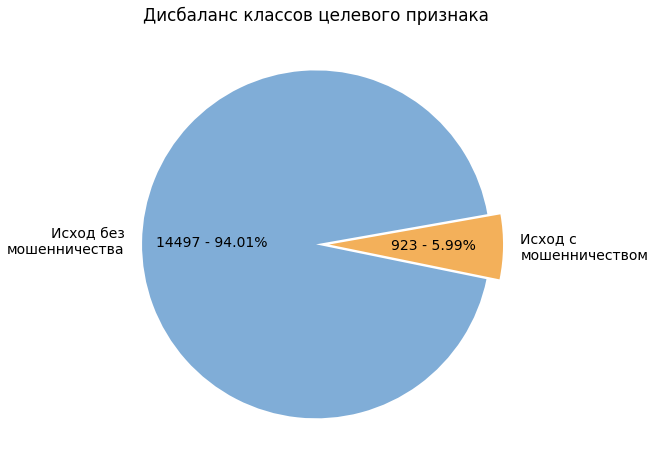

In [18]:
pie_data = df[TARGET].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pie_data,  autopct=lambda p: f"{sum(pie_data) * p/100 :.0f} - {p:.2f}%", explode=(0, 0.075), startangle=10,
        colors=COLORS, labels=[f"Исход без\nмошенничества", f"Исход с\nмошенничеством"])
plt.title("Дисбаланс классов целевого признака")
plt.show()

## Этап 3. Предобработка данных и анализ взаимосвязи переменных

### 3.1 Обработка грязных данных (дупликатов, пропущенных значений, выбросов (outliers))
<ul>
    <li>Удаление строк с грязными данными</li>
    <li>Заполнение средними статистиками (среднее, медиана, мода)</li>
    <li>Бездействие</li>
    <li>Генерация новых фичей</li>
</ul>

#### Поиск дубликатов

In [19]:
df.duplicated(keep=False).sum()

0

<i>Дубликаты отсутствуют</i>

#### Сводные данные о пропусках

In [20]:
df.isna().sum().sum()

0

<i>Явных пропусков нет. Однако, на основе таблицы с описательными статистиками минимумом для возраста является 0.<br> Изучим распределение данной переменной.</i>

In [21]:
pd.DataFrame(df["Age"].value_counts()).reset_index().sort_values(by="index").\
rename(columns={"index": "Age", "Age": "quantity"})

,Age,quantity
20,0,320
64,16,9
65,17,6
46,18,48
56,19,32
...,...,...
49,76,42
60,77,29
52,78,35
63,79,20


<i>Обнаружено 253 пропуска для переменной Age. Обработаем их</i>

In [22]:
df.loc[df["Age"] == 0, "Age"] = df.loc[df["Age"] != 0, "Age"].median()
df.loc[df["Age"] == 0, "Age"]

Series([], Name: Age, dtype: float64)

<i>Проанализируем пропуски переменных MonthClaimed и DayOfWeekClaimed</i>

In [23]:
df.loc[(df["DayOfWeekClaimed"] == "0") | (df["MonthClaimed"] == "0"), :]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
PolicyNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1517,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,39.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,0


<i>Заменим данные пропуски модой распределений</i>

In [24]:
df.loc[df["DayOfWeekClaimed"] == "0", "DayOfWeekClaimed"] = df.loc[df["DayOfWeekClaimed"] != "0", "DayOfWeekClaimed"].mode()[0]
df.loc[df["MonthClaimed"] == "0", "MonthClaimed"] = df.loc[df["MonthClaimed"] != "0", "MonthClaimed"].mode()[0]
df.loc[1517, :]

Month                   Jul               
WeekOfMonth             2                 
DayOfWeek               Monday            
Make                    Honda             
AccidentArea            Rural             
DayOfWeekClaimed        Monday            
MonthClaimed            Jan               
WeekOfMonthClaimed      1                 
Sex                     Male              
MaritalStatus           Single            
Age                     39                
Fault                   Policy Holder     
PolicyType              Sedan - All Perils
VehicleCategory         Sedan             
VehiclePrice            more than 69000   
RepNumber               15                
Deductible              400               
DriverRating            2                 
Days_Policy_Accident    more than 30      
Days_Policy_Claim       none              
PastNumberOfClaims      none              
AgeOfVehicle            new               
AgeOfPolicyHolder       16 to 17          
PoliceRepor

### 3.2 Исследование взаимосвязи независимых атрибутов с таргетом

#### Функция для принятия решения о принятии/отклонении нулевой гипотезы

In [25]:
def evaluate_pvalue(p_value, α):
    if p_value < α:
        return "отклоняем нулевую гипотезу"
    else:
        return "принимаем нулевую гипотезу"

<b>Кросс-таблица (таблица сопряжённости)</b> - таблица, которая показывает частоту, с которой появляются определенные группы данных

#### Fault

In [26]:
contingency_table = pd.crosstab(df[TARGET], df["Fault"])
contingency_table

Fault,Policy Holder,Third Party
FraudFound_P,,
0,10344,4153
1,886,37


<i>Построим гипотезы:
    <ul>
        <li>Нулевая гипотеза: отсутствуют статистически значимые различия между частотами объектов, представленных в каждой из групп</li>
        <li>Альтернативная гипотеза: статистически значимые различия существуют</li>
        <li>Пороговый уровень: α = 0.01</li>    
    </ul>
</i>

<i>Определим ожидаемые частоты объектов в группах</i>

In [27]:
pd.DataFrame(chi2_contingency(contingency_table)[3]).rename(columns={0: "Rural", 1: "Urban"})

,Rural,Urban
0,10557.802205,3939.197795
1,672.197795,250.802205


<i>Вычислим значение уровня значимости (p-value)</i>

In [28]:
p_value = chi2_contingency(contingency_table)[1]
print(p_value, evaluate_pvalue(p_value, 0.01).capitalize(), sep="\n")

1.4280361401294865e-59
Отклоняем нулевую гипотезу


#### Выявление 'сильных' и 'слабых' номинативных признаков

In [29]:
strong_features, weak_features = {"nominative": [], "numeric": []}, {"nominative": [], "numeric": []}

In [30]:
for column in nominative_features:
    contingency_table = pd.crosstab(df[TARGET], df[column])
    p_value = chi2_contingency(contingency_table)[1]

    if p_value < 0.05:
        strong_features["nominative"].append(column)
    else:
        weak_features["nominative"].append(column)
        
print(f"Предположительно, признаки {', '.join(strong_features['nominative'])} имеют значимую взаимосвязь с {TARGET}")

Предположительно, признаки Month, Make, AccidentArea, MonthClaimed, Sex, Fault, PolicyType, VehicleCategory, VehiclePrice, Days_Policy_Accident, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, AgentType, NumberOfSuppliments, AddressChange_Claim, BasePolicy имеют значимую взаимосвязь с FraudFound_P


#### Age

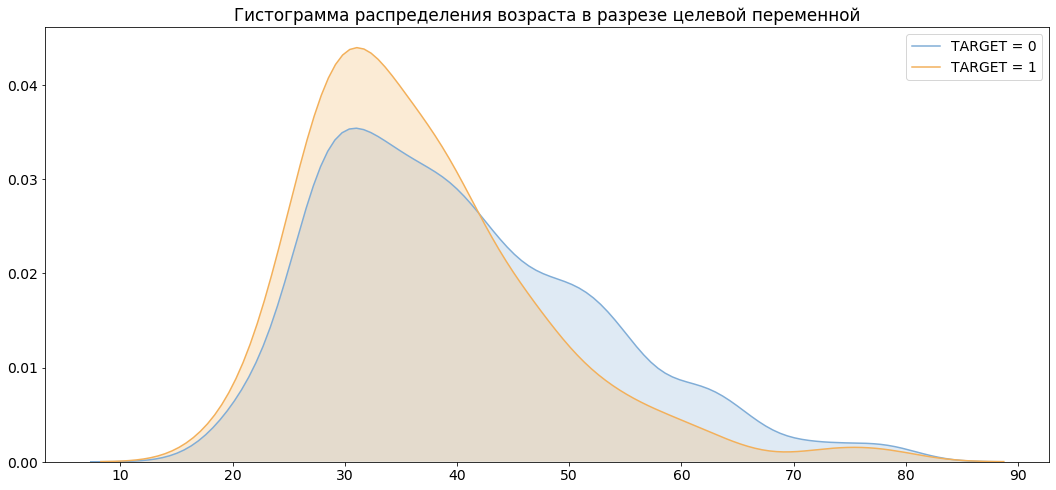

In [31]:
age_with_target_sample = df[["Age", TARGET]].sample(2000, random_state=42)
age_sample = age_with_target_sample["Age"]
age_sample_with_target_is_0 = age_sample[age_with_target_sample[TARGET] == 0]
age_sample_with_target_is_1 = age_sample[age_with_target_sample[TARGET] == 1]

plt.figure(figsize=(18, 8))

sns.kdeplot(age_sample_with_target_is_0, label="TARGET = 0", shade=True, color=COLORS[0])
sns.kdeplot(age_sample_with_target_is_1,  label="TARGET = 1", shade=True, color=COLORS[1])

plt.title("Гистограмма распределения возраста в разрезе целевой переменной")
plt.show()

<i>Построим гипотезы:
    <ul>
        <li>Нулевая гипотеза: средние статистики в двух независимых выборках равны: μ<sub>1</sub> = μ<sub>2</sub></li>
        <li>Альтернативная гипотеза: средние статистики в двух независимых выборках различны: μ<sub>1</sub> ≠ μ<sub>2</sub>     </li>
        <li>Пороговый уровень: α = 0.05</li>
    </ul>
</i>

<i>Проверим распределение Monthly Balance After Payment на нормальность</i>

In [32]:
print(f"p-value = {shapiro(age_sample)[1]},", evaluate_pvalue(shapiro(age_sample)[1], 0.05), "о нормальности распределения")

p-value = 4.6576433395266715e-25, отклоняем нулевую гипотезу о нормальности распределения


<i>Ввиду того, что распределение Age не подчиняется нормальному закону, для проверки статистической гипотезы будет использован непараметрический критерий Манна-Уитни</i>

In [33]:
U, p_value = mannwhitneyu(age_sample_with_target_is_0, age_sample_with_target_is_1)
print(f"p-value = {p_value}, поэтому", evaluate_pvalue(p_value, 0.05), "о равенстве средних двух распределений признака Age,"
      "полученных в результате разбиения объектов по классам целевого атрибута.")

p-value = 0.0015062439309564155, поэтому отклоняем нулевую гипотезу о равенстве средних двух распределений признака Age,полученных в результате разбиения объектов по классам целевого атрибута.


#### Выявление 'сильных' и 'слабых' количественных признаков

In [34]:
for column in numeric_features:
    feature_with_target_sample = df[[column, TARGET]].sample(2000, random_state=42)
    feature_sample = feature_with_target_sample[column]
    feature_sample_with_target_is_0 = feature_sample[feature_with_target_sample[TARGET] == 0]
    feature_sample_with_target_is_1 = feature_sample[feature_with_target_sample[TARGET] == 1]
    
    U, p_value = mannwhitneyu(feature_sample_with_target_is_0, feature_sample_with_target_is_1)
    
    if p_value < 0.05:
        strong_features["numeric"].append(column)
    else:
        weak_features["numeric"].append(column)
        
print(f"Предположительно, признаки {', '.join(strong_features['numeric'])} имеют значимую взаимосвязь с {TARGET}")

Предположительно, признаки Age, RepNumber, Deductible имеют значимую взаимосвязь с FraudFound_P


### 3.3 Кодирование данных и генерация новых признаков

#### Бинаризация (Feature Binarization)

<b>Бинаризация</b> - представление признаков в двоичной шкале [0; 1]

In [35]:
AccidentArea_binary = {"Urban": 1, "Rural": 0}
Sex_binary = {"Male": 1, "Female": 0}
Fault_binary = {"Third Party": 1, "Policy Holder": 0}
WitnessPresent = {"No": 1, "Yes": 0}
PoliceReportFiled_binary = {"No": 1, "Yes": 0}
AgentType_binary = {"External": 1, "Internal": 0}

In [36]:
binary_dict = {"AccidentArea": AccidentArea_binary, "Sex": Sex_binary, "Fault": Fault_binary, "WitnessPresent": WitnessPresent,
              "PoliceReportFiled": PoliceReportFiled_binary, "AgentType": AgentType_binary}

In [37]:
for item in binary_dict.items():
    df[item[0]] = df[item[0]].replace(item[1])
    
df[list(binary_dict.keys())].head()

,AccidentArea,Sex,Fault,WitnessPresent,PoliceReportFiled,AgentType
PolicyNumber,,,,,,
1,1,0,0,1,1,1
2,1,1,0,1,0,1
3,1,1,0,1,1,1
4,0,1,1,1,0,1
5,1,0,1,1,1,1


#### Ordinal Encoding

<b>Ordinal Encoding</b> - представление качественных признаков в порядковой шкале

In [38]:
months_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, 
               "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec":12}
days_of_week_dict = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}

Month_encoding, MonthClaimed_encoding = months_dict, months_dict
DayOfWeek_encoding, DayOfWeekClaimed_encoding = days_of_week_dict, days_of_week_dict

#### Преобразование категориальных переменных, выраженных через численные отрезки, в количественные

In [39]:
VehiclePrice_encoding = {"less than 20000": 19999, "20000 to 29000": 24500, "30000 to 39000": 34500,
                        "40000 to 59000": 49500, "60000 to 69000": 64500, "more than 69000": 69001}
Days_Policy_Accident_encoding = {"none": 0, "1 to 7": 4, "8 to 15": 12, "15 to 30": 22.5, "more than 30": 31}
Days_Policy_Claim_encoding = {"none": 0, "8 to 15": 12, "15 to 30": 23, "more than 30": 31}
PastNumberOfClaims_encoding = {"none": 0, "1": 1, "2 to 4": 3, "more than 4": 5}
AgeOfVehicle_encoding = {"new": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
                         "6 years": 6, "7 years": 7, "more than 7": 8}
AgeOfPolicyHolder_encoding = {"16 to 17": 16.5, "18 to 20": 19, "21 to 25": 23, "26 to 30": 28,
                        "31 to 35": 33, "36 to 40": 38, "41 to 50": 45.5, "51 to 65": 58, "over 65": 66}
NumberOfSuppliments_encoding = {"none": 0, "1 to 2": 1.5, "3 to 5": 4, "more than 5": 6}
AddressChange_Claim_encoding = {"no change": 0, "under 6 months": 0.5, "1 year": 1, "2 to 3 years": 2.5, "4 to 8 years": 6}
NumberOfCars_encoding = {"1 vehicle": 1, "2 vehicles": 2, "3 to 4": 3.5, "5 to 8": 6.5, "more than 8": 9}

In [40]:
encoding_dict = {"VehiclePrice": VehiclePrice_encoding, "Days_Policy_Accident": Days_Policy_Accident_encoding, 
                 "Days_Policy_Claim": Days_Policy_Claim_encoding, "PastNumberOfClaims": PastNumberOfClaims_encoding,
                 "AgeOfVehicle": AgeOfVehicle_encoding, "AgeOfPolicyHolder": AgeOfPolicyHolder_encoding,
                 "NumberOfSuppliments": NumberOfSuppliments_encoding, "AddressChange_Claim": AddressChange_Claim_encoding,
                 "NumberOfCars": NumberOfCars_encoding,  "Month": Month_encoding, "DayOfWeek": DayOfWeek_encoding,  
                 "DayOfWeekClaimed": DayOfWeekClaimed_encoding, "MonthClaimed": MonthClaimed_encoding}

In [41]:
for item in encoding_dict.items():
    df[item[0]] = df[item[0]].replace(item[1])
    
df[list(encoding_dict.keys())].tail()

,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed
PolicyNumber,,,,,,,,,,,,,
15416,24500,31.0,31,3,6,33.0,0.0,0.0,1.0,11,5,2,11
15417,34500,31.0,31,5,6,33.0,6.0,0.0,3.5,11,4,5,12
15418,24500,31.0,31,5,5,28.0,1.5,0.0,1.0,11,4,5,12
15419,24500,31.0,31,0,2,33.0,6.0,0.0,1.0,12,1,4,12
15420,24500,31.0,31,0,5,28.0,1.5,0.0,1.0,12,3,4,12


#### Целевое кодирование (Target Encoding)

<b>Целевое кодирование</b> - способ кодирования категориальных переменных через целевой атрибут. Каждый класс заменяется в случае количественного таргета - медианой/средним, в случае качественного - долей (вероятностью) принадлежности к данному классу

In [42]:
for feature in ["Make", "PolicyType", "RepNumber"]:
    accidents_by_feature = df.groupby([feature]).agg({f"{TARGET}": "count"}).reset_index().\
    rename(columns={"FraudFound_P": "FraudFound_P_Quantity"})
    
    accidents_with_fraud_by_feature = df.groupby([feature]).agg({f"{TARGET}": "sum"}).reset_index().\
    rename(columns={"FraudFound_P": "FraudFound_Pis1_Quantity"})
    
    accidents_with_fraud_by_feature_overall = pd.merge(accidents_with_fraud_by_feature, accidents_by_feature, 
                                           on=[feature], how="inner")
    
    accidents_with_fraud_by_feature_overall[f"FraudFound_Pis1_By_{feature}_Probability"] = \
    accidents_with_fraud_by_feature_overall["FraudFound_Pis1_Quantity"] / \
    accidents_with_fraud_by_feature_overall["FraudFound_P_Quantity"]

    accidents_with_fraud_by_feature_overall.drop(columns=["FraudFound_Pis1_Quantity", "FraudFound_P_Quantity"], 
                                                 axis=1, inplace=True)
    
    df = df.merge(accidents_with_fraud_by_feature_overall, on=feature, how="left")
    df[f"{feature}Probability"] = df[f"FraudFound_Pis1_By_{feature}_Probability"]
    df.drop(columns=[f"{feature}", f"FraudFound_Pis1_By_{feature}_Probability"], inplace=True)

#### Dummy-кодирование (One Hot Encoding)

Сутью <b>Dummy-кодирования</b> является разбиение переменной на N категорий с бинарной шкалой, где N - количество уникальных классов исходной переменной

In [43]:
df = pd.get_dummies(df, columns=["MaritalStatus", "VehicleCategory", "BasePolicy"])
df.columns.to_list()[-10:]

['MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Widow',
 'VehicleCategory_Sedan',
 'VehicleCategory_Sport',
 'VehicleCategory_Utility',
 'BasePolicy_All Perils',
 'BasePolicy_Collision',
 'BasePolicy_Liability']

#### Вид датасета после всех преобразований

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 39 columns):
Month                      15420 non-null int64
WeekOfMonth                15420 non-null int64
DayOfWeek                  15420 non-null int64
AccidentArea               15420 non-null int64
DayOfWeekClaimed           15420 non-null int64
MonthClaimed               15420 non-null int64
WeekOfMonthClaimed         15420 non-null int64
Sex                        15420 non-null int64
Age                        15420 non-null float64
Fault                      15420 non-null int64
VehiclePrice               15420 non-null int64
Deductible                 15420 non-null int64
DriverRating               15420 non-null int64
Days_Policy_Accident       15420 non-null float64
Days_Policy_Claim          15420 non-null int64
PastNumberOfClaims         15420 non-null int64
AgeOfVehicle               15420 non-null int64
AgeOfPolicyHolder          15420 non-null float64
PoliceReportFiled    

In [45]:
df

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,FraudFound_P,MakeProbability,PolicyTypeProbability,RepNumberProbability,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,12,5,3,1,2,1,1,0,21.0,0,69001,300,1,31.0,31,0,3,28.0,1,1,1,0.0,1.0,3.5,1994,0,0.063906,0.000000,0.048106,0,0,1,0,0,1,0,0,0,1
1,1,3,3,1,1,1,4,1,34.0,0,69001,400,4,31.0,31,0,6,33.0,0,1,1,0.0,0.0,1.0,1994,0,0.063906,0.137931,0.050154,0,0,1,0,0,1,0,0,1,0
2,10,5,5,1,4,11,2,1,47.0,0,69001,400,3,31.0,31,1,7,45.5,1,1,1,0.0,0.0,1.0,1994,0,0.063906,0.137931,0.069224,0,1,0,0,0,1,0,0,1,0
3,6,2,6,0,5,7,1,1,65.0,1,24500,400,2,31.0,31,1,8,58.0,0,1,1,6.0,0.0,1.0,1994,0,0.059596,0.007219,0.054825,0,1,0,0,0,1,0,0,0,1
4,1,5,1,1,2,2,2,0,27.0,1,69001,400,1,31.0,31,0,5,33.0,1,1,1,0.0,0.0,1.0,1994,0,0.063906,0.137931,0.063224,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,5,1,2,11,5,1,35.0,0,24500,400,4,31.0,31,3,6,33.0,1,1,1,0.0,0.0,1.0,1996,1,0.059596,0.068768,0.052685,0,1,0,0,1,0,0,0,1,0
15416,11,5,4,1,5,12,1,1,30.0,0,34500,400,3,31.0,31,5,6,33.0,1,1,1,6.0,0.0,3.5,1996,0,0.055512,0.007219,0.059072,0,1,0,0,0,1,0,0,0,1
15417,11,5,4,0,5,12,1,1,24.0,0,24500,400,4,31.0,31,5,5,28.0,1,1,1,1.5,0.0,1.0,1996,1,0.059596,0.068768,0.054825,0,0,1,0,1,0,0,0,1,0
15418,12,1,1,1,4,12,2,0,34.0,1,24500,400,4,31.0,31,0,2,33.0,1,1,1,6.0,0.0,1.0,1996,0,0.059596,0.100563,0.070064,0,1,0,0,1,0,0,1,0,0


#### Оптипизация памяти

In [46]:
df["DayOfWeekClaimed"] = df["DayOfWeekClaimed"].astype(int)
df["MonthClaimed"] = df["MonthClaimed"].astype(int)

In [47]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df

df = optimize_floats(df)
df = optimize_ints(df)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 39 columns):
Month                      15420 non-null int8
WeekOfMonth                15420 non-null int8
DayOfWeek                  15420 non-null int8
AccidentArea               15420 non-null int8
DayOfWeekClaimed           15420 non-null int32
MonthClaimed               15420 non-null int32
WeekOfMonthClaimed         15420 non-null int8
Sex                        15420 non-null int8
Age                        15420 non-null float32
Fault                      15420 non-null int8
VehiclePrice               15420 non-null int32
Deductible                 15420 non-null int16
DriverRating               15420 non-null int8
Days_Policy_Accident       15420 non-null float32
Days_Policy_Claim          15420 non-null int8
PastNumberOfClaims         15420 non-null int8
AgeOfVehicle               15420 non-null int8
AgeOfPolicyHolder          15420 non-null float32
PoliceReportFiled          15420

## Этап 4. Построение моделей машинного обучения

### 4.1 Разбиение данных на обучающую и тестовую выборку

In [49]:
x = df.drop(columns=[TARGET])
y = df[[TARGET]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
x_train.isna().sum().sum(), x_test.isna().sum().sum()

(0, 0)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12336, 38), (3084, 38), (12336, 1), (3084, 1))

In [52]:
scaler = StandardScaler()

In [53]:
transformed_features = x_test.columns

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 4.2 Балансировка классов целевой переменной

In [54]:
sm = SMOTE(random_state=42)
y_train_scaled = y_train.copy()
x_train, y_train = sm.fit_resample(x_train, y_train)
x_train_scaled, y_train = sm.fit_resample(x_train_scaled, y_train_scaled)

### 4.3 Построение моделей, оценка качества и оптимизация гиперпараметров

In [55]:
starttime = timeit.default_timer()

In [56]:
models_results = pd.Series()

#### Функция для построения моделей и определения метрик качества

In [57]:
def get_model(model, title, x_train = x_train, x_test = x_test):
    model.fit(x_train, y_train)
    
    y_train_pred, y_test_pred = model.predict(x_train), model.predict(x_test)
    
    reports = {"train scores": classification_report(y_train, y_train_pred), 
                   "test scores": classification_report(y_test, y_test_pred),
                   "confusion matrix": confusion_matrix(y_test, y_test_pred)
              }
              
    return {"model": model, "title": title, "y_train_pred": y_train_pred, "y_test_pred": y_test_pred, "reports": reports}

#### Логистическая регрессия

<b>Бинарная логистическая регрессия</b> — это разновидность множественной регрессии, общее назначение которой состоит в анализе связи между несколькими независимыми переменными (называемыми также регрессорами или предикторами) и зависимой переменной, представленной в двоичной шкале.

In [58]:
lr = get_model(title="Логистическая регрессия", model=LogisticRegression(), x_train = x_train_scaled, x_test = x_test_scaled)

F-мера позволяет оценить в комплексе как Precision, так и Recall, поэтому наиболее важным критерием качества модели будем считать F<sub>1</sub>&ndash;score

In [59]:
print(f"\tМетрики качества модели '{lr['title']}'\n\n\t\t\tОбучающая выборка\n{lr['reports'].get('train scores')}"
      f"\n\n\t\t\tТестовая выборка\n{lr['reports'].get('test scores')}")

	Метрики качества модели 'Логистическая регрессия'

			Обучающая выборка
              precision    recall  f1-score   support

           0       0.85      0.63      0.72     11610
           1       0.71      0.89      0.79     11610

    accuracy                           0.76     23220
   macro avg       0.78      0.76      0.76     23220
weighted avg       0.78      0.76      0.76     23220


			Тестовая выборка
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      2887
           1       0.14      0.86      0.24       197

    accuracy                           0.64      3084
   macro avg       0.56      0.75      0.50      3084
weighted avg       0.93      0.64      0.73      3084



С целью сопоставления предсказаний и реальности используется <b>матрица ошибок (confusion matrix)</b> – таблица с 4 различными комбинациями прогнозируемых и фактических значений. Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные.

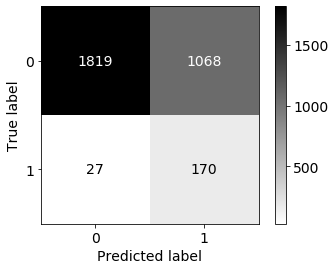

In [60]:
fig = ConfusionMatrixDisplay(confusion_matrix=lr["reports"].get("confusion matrix"))
fig.plot(cmap="binary")
plt.show()

<i>Оценим вероятность принадлежности целевой переменной к предсказанному классу</i>

In [61]:
lr["model"].classes_

array([0, 1], dtype=int8)

In [62]:
y_test_predict_proba = lr["model"].predict_proba(x_test_scaled)
y_test_predict_proba

array([[0.48332562, 0.51667438],
       [0.93039953, 0.06960047],
       [0.35087306, 0.64912694],
       ...,
       [0.94610779, 0.05389221],
       [0.87881682, 0.12118318],
       [0.23691987, 0.76308013]])

<i>Вычислим порог вероятности принадлежности объекта к целевому классу, при котором F<sub>1</sub>&ndash;score достигает наибольшего значения</i>

In [63]:
f1_scores = list()
for p in pd.DataFrame(y_test_predict_proba).iloc[:, 1].unique():
    f1_scores.append([p, f1_score(y_test, lr["model"].predict_proba(x_test_scaled)[:,1] >= p)])

In [64]:
f1_scores_df = pd.DataFrame(f1_scores, columns=["threshold probability", "f1_score"])
f1_score_max = f1_scores_df.iloc[:, 1].max()
threshold_probability_max = f1_scores_df.loc[f1_scores_df["f1_score"] == f1_score_max, "threshold probability"]
print(f"Оптимальный порог вероятности = {threshold_probability_max.iloc[0]} с f1_score = {f1_score_max}")

Оптимальный порог вероятности = 0.7654350134289478 с f1_score = 0.29149797570850206


In [65]:
f1_scores_df

,threshold probability,f1_score
0,0.516674,0.234708
1,0.069600,0.140502
2,0.649127,0.270492
3,0.765218,0.290323
4,0.748666,0.274074
...,...,...
3079,0.048433,0.130854
3080,0.059568,0.135302
3081,0.053892,0.132437
3082,0.121183,0.176228


Text(0.5, 1.0, 'Зависимость метрики F1-score от порога вероятности')

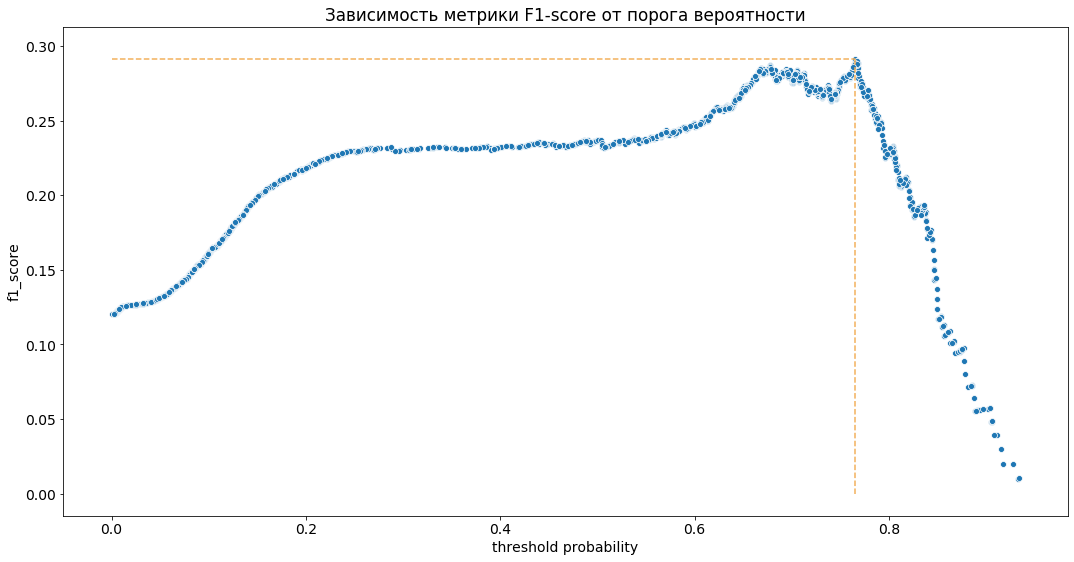

In [66]:
fig = plt.figure(figsize=(18, 9))
sns.scatterplot(data=f1_scores_df, x="threshold probability", y="f1_score")
plt.hlines(f1_score_max, y.min(), threshold_probability_max, linestyle = '--', color=COLORS[1])
plt.vlines(threshold_probability_max, y.min(), f1_score_max, linestyle = '--', color=COLORS[1])
plt.title("Зависимость метрики F1-score от порога вероятности")

<i>Определим метрики оценки качества финальной модели логистической регрессии</i>

In [67]:
print(classification_report(y_test, lr["model"].predict_proba(x_test_scaled)[:,1] >= threshold_probability_max.iloc[0]))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2887
           1       0.24      0.37      0.29       197

    accuracy                           0.89      3084
   macro avg       0.60      0.64      0.61      3084
weighted avg       0.91      0.89      0.90      3084



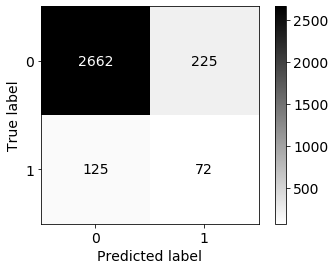

In [68]:
fig = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, 
                                            lr["model"].predict_proba(x_test_scaled)[:,1] >= threshold_probability_max.iloc[0]))
fig.plot(cmap="binary")
plt.show()

In [69]:
models_results = pd.concat([models_results, pd.Series({lr["title"]: round(f1_score_max, 2)})])

#### Метод k-ближайших соседей

Суть <b>метода k-ближайших соседей</b> заключается в нахождении числа k ближайших соседей прогнозируемого объекта и отнесении его к тому классу, представителей которого больше среди данных k соседей.

In [70]:
knn = get_model(title="Метод k-ближайших соседей", model=KNeighborsClassifier(), 
                x_train = x_train_scaled, x_test = x_test_scaled)

In [71]:
for i in range(3, 16):
    knn = get_model(title=f"Метод {i}-ближайших соседей", model=KNeighborsClassifier(n_neighbors=i), 
                    x_train = x_train_scaled, x_test = x_test_scaled)
    print(knn["title"], ":", f1_score(y_test, knn["y_test_pred"]))

Метод 3-ближайших соседей : 0.2012738853503185
Метод 4-ближайших соседей : 0.20134228187919462
Метод 5-ближайших соседей : 0.2123510292524377
Метод 6-ближайших соседей : 0.21064814814814814
Метод 7-ближайших соседей : 0.19883040935672516
Метод 8-ближайших соседей : 0.20328542094455854
Метод 9-ближайших соседей : 0.20627802690582958
Метод 10-ближайших соседей : 0.21082089552238809
Метод 11-ближайших соседей : 0.20980223559759242
Метод 12-ближайших соседей : 0.21108179419525067
Метод 13-ближайших соседей : 0.21370309951060357
Метод 14-ближайших соседей : 0.21362489486963834
Метод 15-ближайших соседей : 0.21926389976507438


<i>Подбор оптимального количества соседних объектов не оказал высокую эффективность для максимизации f1_score</i>

In [72]:
print(f"\tМетрики качества модели '{knn['title']}'\n\n\t\t\tОбучающая выборка\n{knn['reports'].get('train scores')}"
      f"\n\n\t\t\tТестовая выборка\n{knn['reports'].get('test scores')}")

	Метрики качества модели 'Метод 15-ближайших соседей'

			Обучающая выборка
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     11610
           1       0.76      1.00      0.86     11610

    accuracy                           0.84     23220
   macro avg       0.88      0.84      0.84     23220
weighted avg       0.88      0.84      0.84     23220


			Тестовая выборка
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      2887
           1       0.13      0.71      0.22       197

    accuracy                           0.68      3084
   macro avg       0.55      0.69      0.51      3084
weighted avg       0.92      0.68      0.76      3084



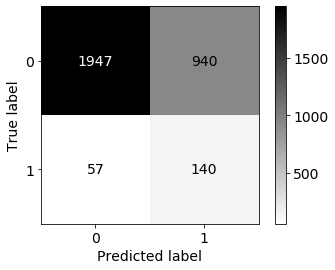

In [73]:
fig = ConfusionMatrixDisplay(confusion_matrix=knn["reports"].get("confusion matrix"))
fig.plot(cmap="binary")
plt.show()

In [74]:
models_results = pd.concat([models_results, pd.Series({knn["title"]: round(f1_score(y_test, knn["y_test_pred"]), 2)})])

#### Cлучайный лес

In [75]:
rfc_base = get_model(title="базовая модель случайного леса", model=RandomForestClassifier(random_state=42))
print(f"Обучена {rfc_base['title']} c f1_score = {round(f1_score(y_test, rfc_base['y_test_pred']), 2)}")

Обучена базовая модель случайного леса c f1_score = 0.13


Краткое описание гиперпараметров, включенных в словарь для подбора:
<ul>
    <li><b>n_estimators</b> - число деревьев</li>
    <li><b>max_depth</b> - максимальная глубина деревьев</li>
    <li><b>min_samples_leaf</b> - ограничение на число объектов в листьях</li>
</ul>

In [76]:
rfc = RandomForestClassifier(random_state=42)
parameters = {"n_estimators": [1200, 1600, 2000], "max_depth": [10, 13, 16], "min_samples_leaf": [4, 8, 12]}

In [77]:
randm_src = RandomizedSearchCV(estimator=rfc, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src.fit(x_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=16, min_samples_leaf=4, n_estimators=1200,
                       random_state=42)

 The best score across ALL searched params:
 0.9475452196382429

 The best parameters across ALL searched params:
 {'n_estimators': 1200, 'min_samples_leaf': 4, 'max_depth': 16}


<i>Определим метрики оценки качества финальной модели случайного леса</i>

In [78]:
n_estimators, max_depth, min_samples_leaf = randm_src.best_params_.values()

In [79]:
rfc = get_model(title="Случайный лес", 
               model=RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth,
                                            min_samples_leaf = min_samples_leaf, random_state=42))

In [80]:
print(f"\tМетрики качества модели '{rfc['title']}'\n\n\t\t\tОбучающая выборка\n{rfc['reports'].get('train scores')}"
      f"\n\n\t\t\tТестовая выборка\n{rfc['reports'].get('test scores')}")

	Метрики качества модели 'Случайный лес'

			Обучающая выборка
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     11610
           1       0.77      0.97      0.86     11610

    accuracy                           0.84     23220
   macro avg       0.87      0.84      0.84     23220
weighted avg       0.87      0.84      0.84     23220


			Тестовая выборка
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      2887
           1       0.15      0.78      0.26       197

    accuracy                           0.71      3084
   macro avg       0.57      0.74      0.54      3084
weighted avg       0.93      0.71      0.78      3084



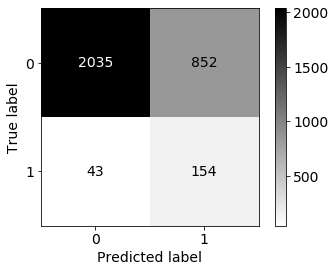

In [81]:
fig = ConfusionMatrixDisplay(confusion_matrix=rfc["reports"].get("confusion matrix"))
fig.plot(cmap="binary")
plt.show()

In [82]:
models_results = pd.concat([models_results, pd.Series({rfc["title"]: round(f1_score(y_test, rfc["y_test_pred"]), 2)})])

#### XGBoost

Алгоритм <b>XGBoost</b> основан на бустинге. Под данным термином понимают однородных слабых учеников (деревьев), обученных последовательно адаптивным способом (слабый ученик зависит от предыдущих) и объединённых, следуя детерминированной стратегии.

In [83]:
xgboost = get_model(title="XGBoost", model=XGBClassifier(max_depth = 5, alpha = 10, n_estimators = 10, eval_metric="mlogloss"))

In [84]:
print(f"\tМетрики качества модели '{xgboost['title']}'\n\n\t\t\tОбучающая выборка\n{xgboost['reports'].get('train scores')}"
      f"\n\n\t\t\tТестовая выборка\n{xgboost['reports'].get('test scores')}")

	Метрики качества модели 'XGBoost'

			Обучающая выборка
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     11610
           1       0.90      0.95      0.92     11610

    accuracy                           0.92     23220
   macro avg       0.92      0.92      0.92     23220
weighted avg       0.92      0.92      0.92     23220


			Тестовая выборка
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2887
           1       0.25      0.51      0.33       197

    accuracy                           0.87      3084
   macro avg       0.61      0.70      0.63      3084
weighted avg       0.92      0.87      0.89      3084



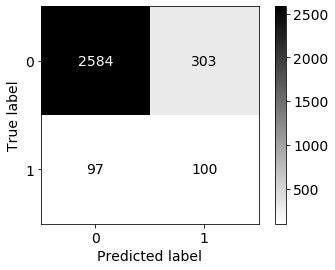

In [85]:
fig = ConfusionMatrixDisplay(confusion_matrix=xgboost["reports"].get("confusion matrix"))
fig.plot(cmap="binary")
plt.show()

In [86]:
models_results = pd.concat([models_results, pd.Series({xgboost["title"]: round(f1_score(y_test, xgboost["y_test_pred"]), 2)})])

In [87]:
time_execution = timeit.default_timer() - starttime

### 4.4 Оценка важности признаков

#### Логистическая регрессия

In [88]:
lr_features = pd.DataFrame({
    "feature": x_test.columns,
    "coefficient": lr["model"].coef_[0],
    "absolute coefficient": np.abs(lr["model"].coef_[0])
})

lr_features = lr_features.sort_values(by="absolute coefficient", ascending=False)
lr_features[:10]

,feature,coefficient,absolute coefficient
26,PolicyTypeProbability,1.313335,1.313335
9,Fault,-1.310918,1.310918
32,VehicleCategory_Sedan,0.281684,0.281684
33,VehicleCategory_Sport,-0.267736,0.267736
37,BasePolicy_Liability,0.265910,0.265910
35,BasePolicy_All Perils,-0.253899,0.253899
17,AgeOfPolicyHolder,-0.230972,0.230972
27,RepNumberProbability,0.196852,0.196852
7,Sex,0.181487,0.181487
25,MakeProbability,0.151649,0.151649


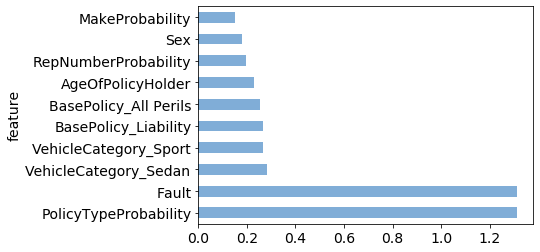

In [89]:
lr_features.set_index("feature", inplace=True)
lr_features.iloc[:10, 1].plot(kind="barh", color=COLORS[0])

#### Cлучайный лес

In [90]:
rfc_features = pd.DataFrame({
    "feature": x_test.columns,
    "importance": rfc["model"].feature_importances_
})

rfc_features = rfc_features.sort_values(by="importance", ascending=False)
rfc_features[:10]

,feature,importance
26,PolicyTypeProbability,0.216445
37,BasePolicy_Liability,0.164153
9,Fault,0.147914
33,VehicleCategory_Sport,0.113704
25,MakeProbability,0.047055
15,PastNumberOfClaims,0.041521
36,BasePolicy_Collision,0.041367
24,Year,0.035088
32,VehicleCategory_Sedan,0.024225
12,DriverRating,0.019304


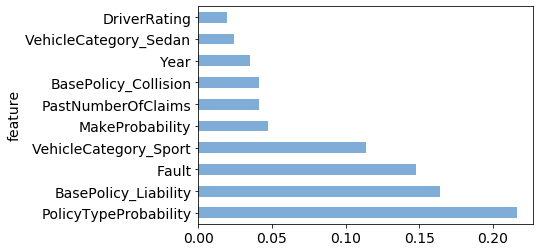

In [91]:
rfc_features.set_index("feature", inplace=True)
rfc_features.iloc[:10, 0].plot(kind="barh", color=COLORS[0])

#### XGBoost

In [92]:
xgboost_features = pd.DataFrame({
    "feature": x_test.columns,
    "importance": xgboost["model"].feature_importances_
})

xgboost_features = xgboost_features.sort_values(by="importance", ascending=False)
xgboost_features[:10]

,feature,importance
9,Fault,0.160278
36,BasePolicy_Collision,0.155929
26,PolicyTypeProbability,0.127195
35,BasePolicy_All Perils,0.126817
29,MaritalStatus_Married,0.075679
12,DriverRating,0.044670
15,PastNumberOfClaims,0.030238
30,MaritalStatus_Single,0.025646
11,Deductible,0.025307
27,RepNumberProbability,0.023470


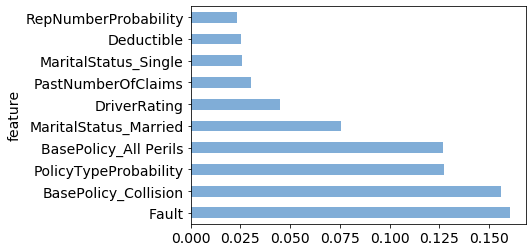

In [93]:
xgboost_features.set_index("feature", inplace=True)
xgboost_features.iloc[:10, 0].plot(kind="barh", color=COLORS[0])

## Этап 5. Заключение

In [94]:
print(f"Время построения всех моделей: {round(time_execution)} сек.")

Время построения всех моделей: 486 сек.


<i>Выведем наилучшие метрики качества полученных моделей</i>

In [95]:
models_results

Логистическая регрессия       0.29
Метод 15-ближайших соседей    0.22
Случайный лес                 0.26
XGBoost                       0.33
dtype: float64

<i>Сравним степени важности признаков, полученные разными моделями. Определим отдельную шкалу, отображающую суммарную степень важности признака, оцененную 3 моделями</i>

In [96]:
importances_df = pd.concat([pd.DataFrame(lr_features.loc[:, "absolute coefficient"]), rfc_features, xgboost_features], axis=1)
importances_df.columns = ["Logistic Regression", "Random Forest", "XGBoost"]
importances_df.T

,AccidentArea,AddressChange_Claim,Age,AgeOfPolicyHolder,AgeOfVehicle,AgentType,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,DayOfWeek,DayOfWeekClaimed,Days_Policy_Accident,Days_Policy_Claim,Deductible,DriverRating,Fault,MakeProbability,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Month,MonthClaimed,NumberOfCars,NumberOfSuppliments,PastNumberOfClaims,PoliceReportFiled,PolicyTypeProbability,RepNumberProbability,Sex,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice,WeekOfMonth,WeekOfMonthClaimed,WitnessPresent,Year
Logistic Regression,0.017669,0.134565,0.039274,0.230972,0.022911,0.129781,0.253899,0.019675,0.265910,0.019591,0.039541,0.069052,0.058425,0.130883,0.012115,1.310918,0.151649,0.130308,0.085937,0.072723,0.053911,0.131231,0.010602,0.072322,0.097014,0.026505,0.055227,1.313335,0.196852,0.181487,0.281684,0.267736,0.055055,0.085374,0.063541,0.074009,0.047965,0.049783
Random Forest,0.010436,0.006207,0.003679,0.002967,0.018038,0.000006,0.014146,0.041367,0.164153,0.002815,0.002053,0.000053,0.000000,0.008440,0.019304,0.147914,0.047055,0.000016,0.004007,0.007690,0.000000,0.006794,0.008869,0.000555,0.010497,0.041521,0.000029,0.216445,0.012121,0.000102,0.024225,0.113704,0.000892,0.004263,0.015240,0.009309,0.000001,0.035088
XGBoost,0.008441,0.010821,0.002415,0.003590,0.019720,0.000684,0.126817,0.155929,0.000000,0.011074,0.005033,0.000644,0.000064,0.025307,0.044670,0.160278,0.020766,0.008347,0.075679,0.025646,0.003098,0.011830,0.014189,0.000546,0.003943,0.030238,0.001091,0.127195,0.023470,0.003747,0.000000,0.000000,0.003718,0.019572,0.017460,0.012655,0.000657,0.020667


In [97]:
scores = list(range(len(importances_df.index), 0, -1))

importances_lr_ranking = importances_df[["Logistic Regression"]].sort_values(by="Logistic Regression", ascending=False)
importances_rfc_ranking = importances_df[["Random Forest"]].sort_values(by="Random Forest", ascending=False)
importances_xgboost_ranking = importances_df[["XGBoost"]].sort_values(by="XGBoost", ascending=False)

importances_lr_ranking["Feature Score by LR"] = scores 
importances_rfc_ranking["Feature Score by RF"] = scores 
importances_xgboost_ranking["Feature Score by XGBoost"] = scores

importances_df = pd.concat([importances_lr_ranking, importances_rfc_ranking, importances_xgboost_ranking], axis=1)
importances_df["Sum Score"] = importances_df["Feature Score by LR"] + importances_df["Feature Score by RF"] + \
importances_df["Feature Score by XGBoost"]

importances_df = importances_df.sort_values(by="Sum Score", ascending=False)
importances_df

,Logistic Regression,Feature Score by LR,Random Forest,Feature Score by RF,XGBoost,Feature Score by XGBoost,Sum Score
PolicyTypeProbability,1.313335,38,0.216445,38,0.127195,36,112
Fault,1.310918,37,0.147914,36,0.160278,38,111
BasePolicy_All Perils,0.253899,33,0.014146,26,0.126817,35,94
MakeProbability,0.151649,29,0.047055,34,0.020766,28,91
RepNumberProbability,0.196852,31,0.012121,25,0.023470,29,85
Deductible,0.130883,26,0.008440,20,0.025307,30,76
BasePolicy_Collision,0.019675,5,0.041367,32,0.155929,37,74
VehicleCategory_Sport,0.267736,35,0.113704,35,0.000000,2,72
BasePolicy_Liability,0.265910,34,0.164153,37,0.000000,1,72
PastNumberOfClaims,0.026505,7,0.041521,33,0.030238,32,72


<i>Отобразим признаки в виде ранжированной по степени их важности столбчатой диаграммы</i>

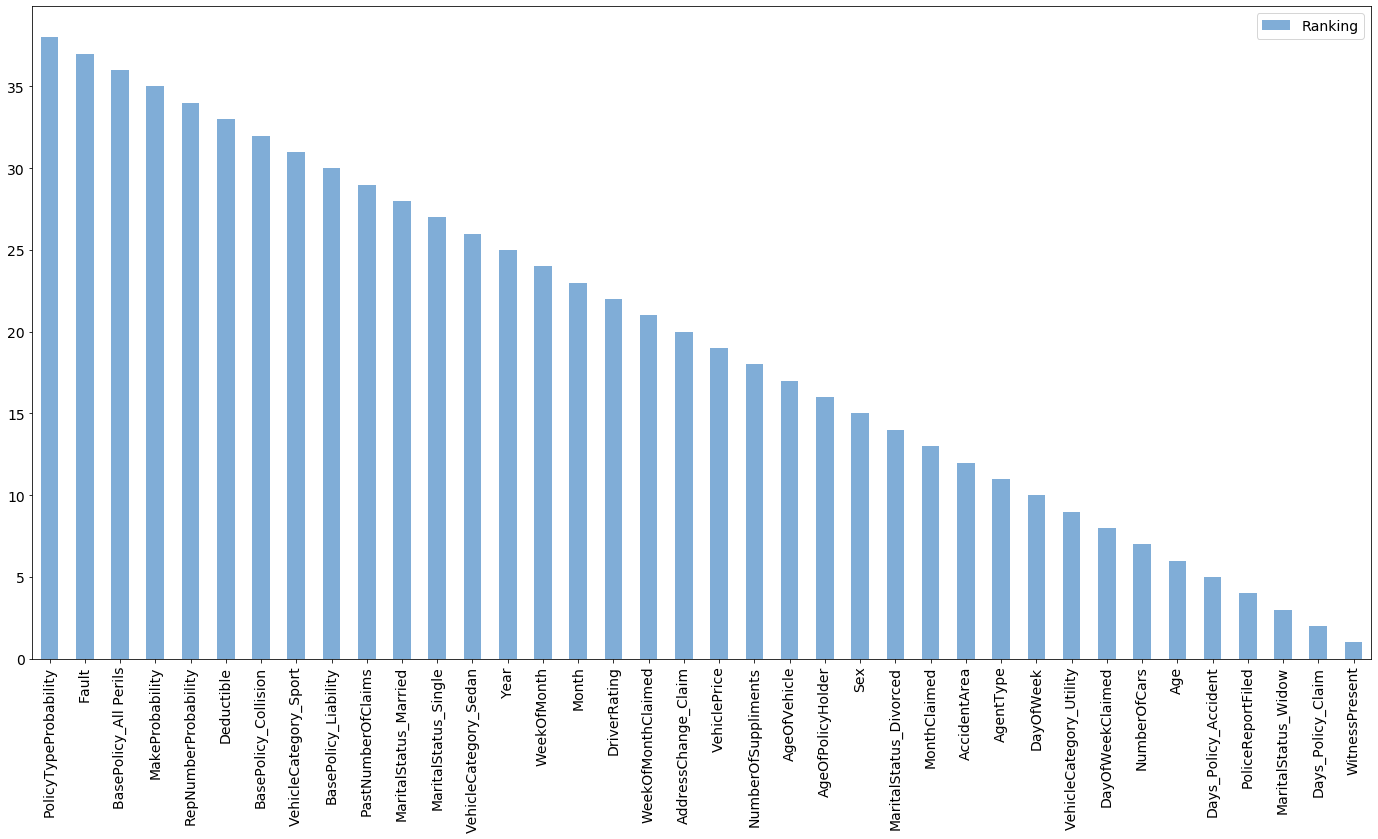

In [98]:
importances_df["Ranking"] = scores

importances_df[["Ranking"]].plot(figsize=(24, 12), kind="bar", color=COLORS[0])
plt.xticks(rotation=90)
plt.show()

<i>Представим информацию о важности признаков, определённой с помощью статистического критерия</i>

In [99]:
def get_importance(feature, feature_class):
    if feature in strong_features[feature_class]:
        return True
    elif feature in weak_features[feature_class]:
        return False
    else:
        return None

In [100]:
importances_by_test = pd.DataFrame({"feature": features}, columns=["feature", "class", "importance by Chi-squared test",
                                                 "importance by Mann-Whitney U test"])

importances_by_test["class"] = importances_by_test["feature"].\
apply(lambda x: "nominative" if x in nominative_features else "numeric")

importances_by_test["importance by Chi-squared test"] = importances_by_test["feature"].\
apply(lambda x: get_importance(x, "nominative"))

importances_by_test["importance by Mann-Whitney U test"] = importances_by_test["feature"].\
apply(lambda x: get_importance(x, "numeric"))

importances_by_test

,feature,class,importance by Chi-squared test,importance by Mann-Whitney U test
0,Month,nominative,True,None
1,WeekOfMonth,numeric,None,False
2,DayOfWeek,nominative,False,None
3,Make,nominative,True,None
4,AccidentArea,nominative,True,None
5,DayOfWeekClaimed,nominative,False,None
6,MonthClaimed,nominative,True,None
7,WeekOfMonthClaimed,numeric,None,False
8,Sex,nominative,True,None
9,MaritalStatus,nominative,False,None


Выводы:
<ul>
   <li>Модель с наилучшими метриками качества - <b>XGBoost</b></li>
    <li>Результаты, полученные с помощью статистических тестов, имеют <b>сильную корреляцию</b><br/> с результатами, полученными при помощи обучения моделей</li>
    <li>С помощью <b>подбора гиперпараметров</b> модели можно значительно улучшить её качество, главное учесть фактор переобучения</li>
</ul>